In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##  Understanding the Dataset for churn prediction

In [4]:
df = pd.read_csv('churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Here we can infer that columns Rownumber, CustomerId, and Surname only describe customers uniquely and do not affect the target variable, so we can drop these columns.



In [8]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


The other observation is we have two more categorical columns, geography, and gender, which we will encode using labelencoder() provided by the sklearn library of python.



## Data preprocessing

In [9]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### Checking the presence of null values

In [10]:
df.isna().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


There is no missing or duplicate value in any column. Hence we do not need to drop anything. Otherwise, we can use df.dropna() to drop them.



Plot Boxplot to check outliers¶


In [11]:
numcols=['CreditScore','Age','Tenure','Balance','EstimatedSalary']

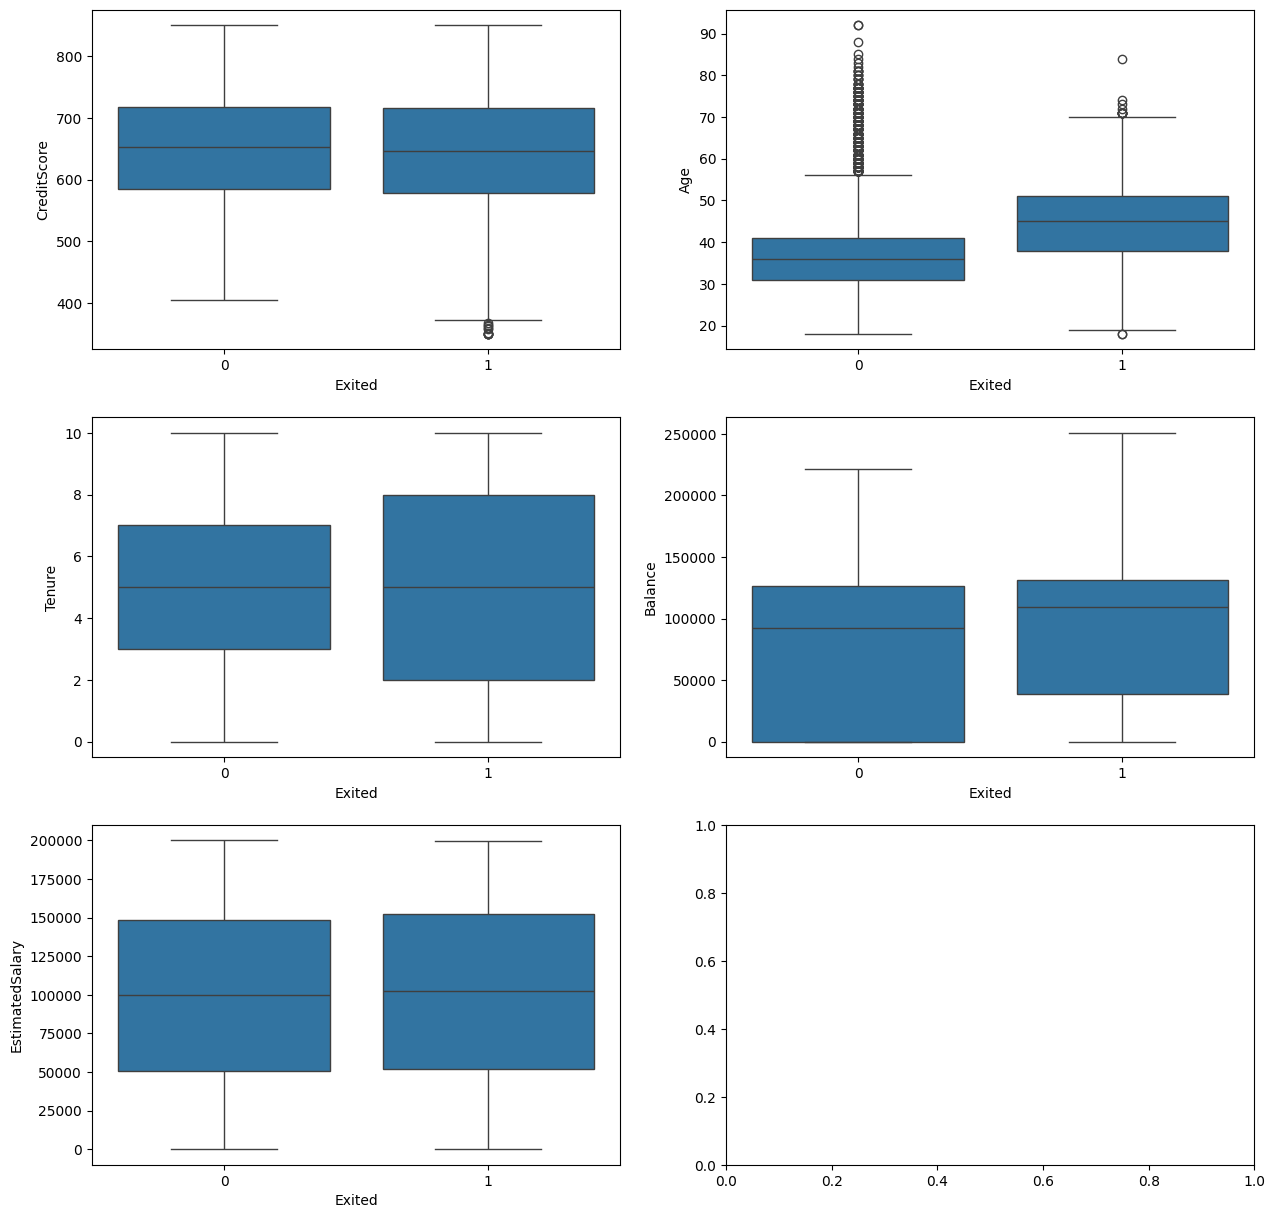

In [12]:
fig, ax = plt.subplots(3,2, figsize = (15,15))

for i, subplot in zip(numcols, ax.flatten()):
    sns.boxplot(x = 'Exited', y = i , data = df, ax = subplot)

plt.show()

Removing outliers.¶ <br>

Outliers are data points that lie far away from the majority of other observations. They can significantly influence the model’s learning process and bias predictions toward these extreme values.

There are two common approaches to detect and remove outliers:

1. Interquartile Range (IQR)

2. Standard Deviation

In this project, we will use the IQR method to identify and remove outliers.

In [13]:
for i in numcols:
    q75, q25 = np.percentile(df[i], [75 ,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)


    df=df[(df[i]<max_val)]
    df=df[(df[i]>min_val)]

We have removed outliers from the customer dataset and can validate from the boxplot.


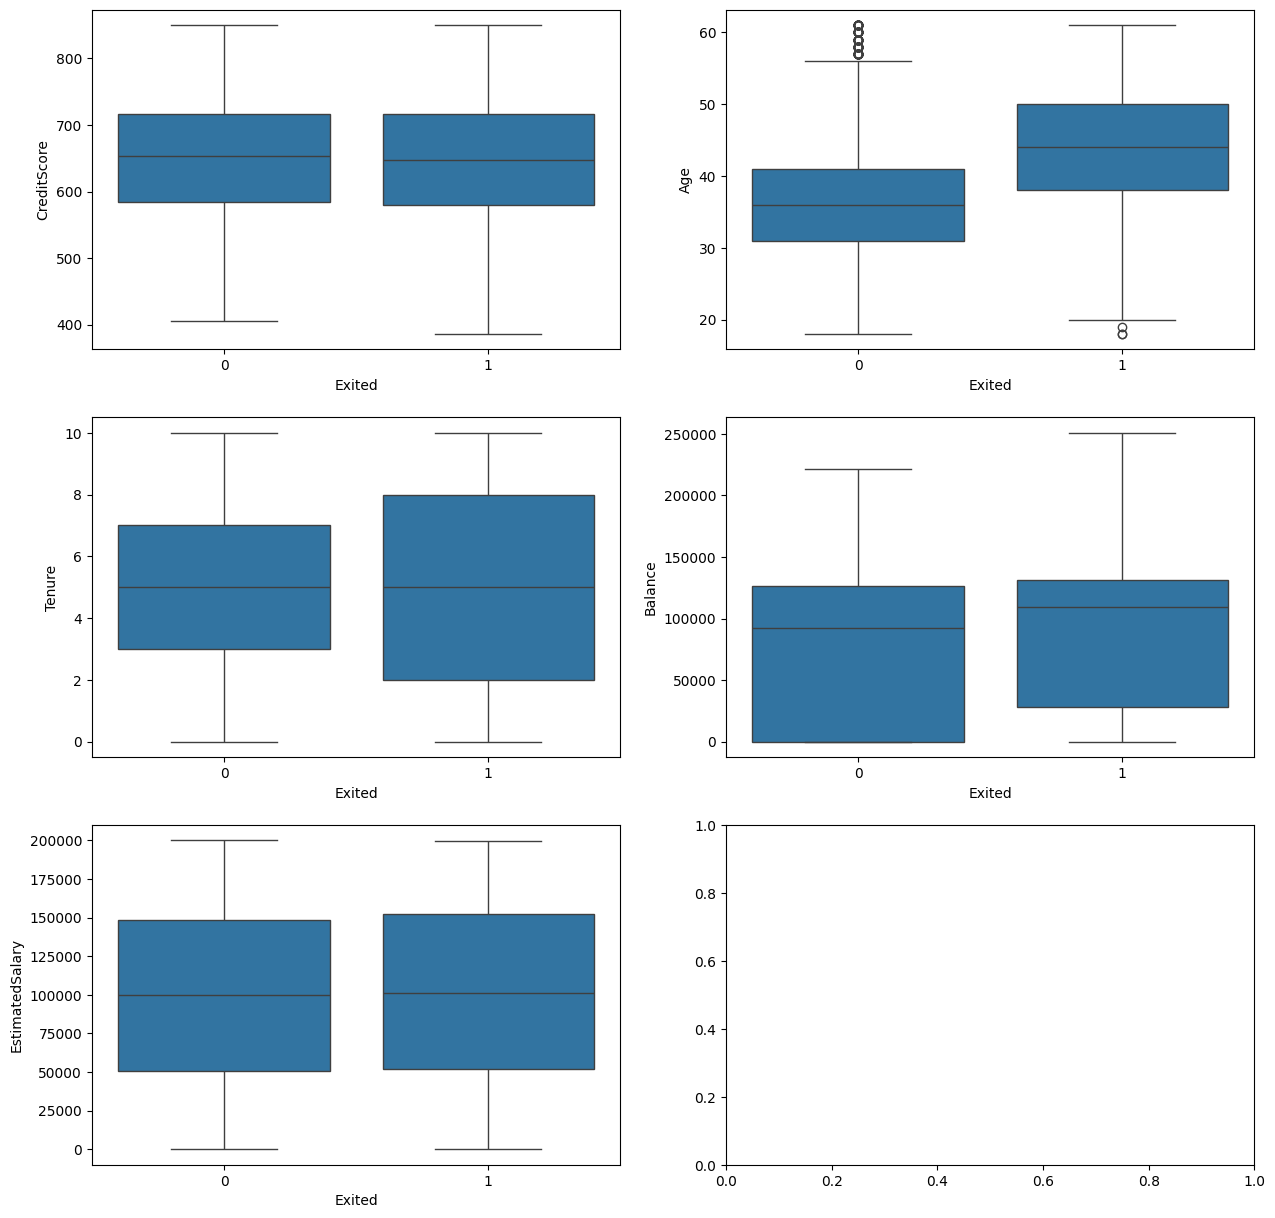

In [14]:
fig, ax = plt.subplots(3,2, figsize = (15,15))

for i, subplot in zip(numcols, ax.flatten()):
    sns.boxplot(x = 'Exited', y = i , data = df, ax = subplot)

plt.show()

The Age column still contains some outliers, but fewer than before the data preprocessing. The plots indicate that most features are balanced around the box’s central line, except for the Balance column.

Boxplots are also useful for visualizing the distribution of data across the quartiles.

Transform non-numerical labels to numerical labels.¶


We have two more categorical columns, geography, and gender, which we will encode using labelencoder().



In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

In [18]:
le.classes_

array(['Female', 'Male'], dtype=object)

In [19]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [22]:
df['Gender'].unique()

array([0, 1])

In [23]:
df['Geography'].unique()

array([0, 2, 1])

## Exploratory Data Analysis

Heatmap showing the correlation of features.¶


A correlation heatmap helps us visualize the relationship between numerical variables.

Values close to +1 indicate a strong positive correlation, values close to -1 indicate a strong negative correlation, and values near 0 suggest little to no linear relationship.

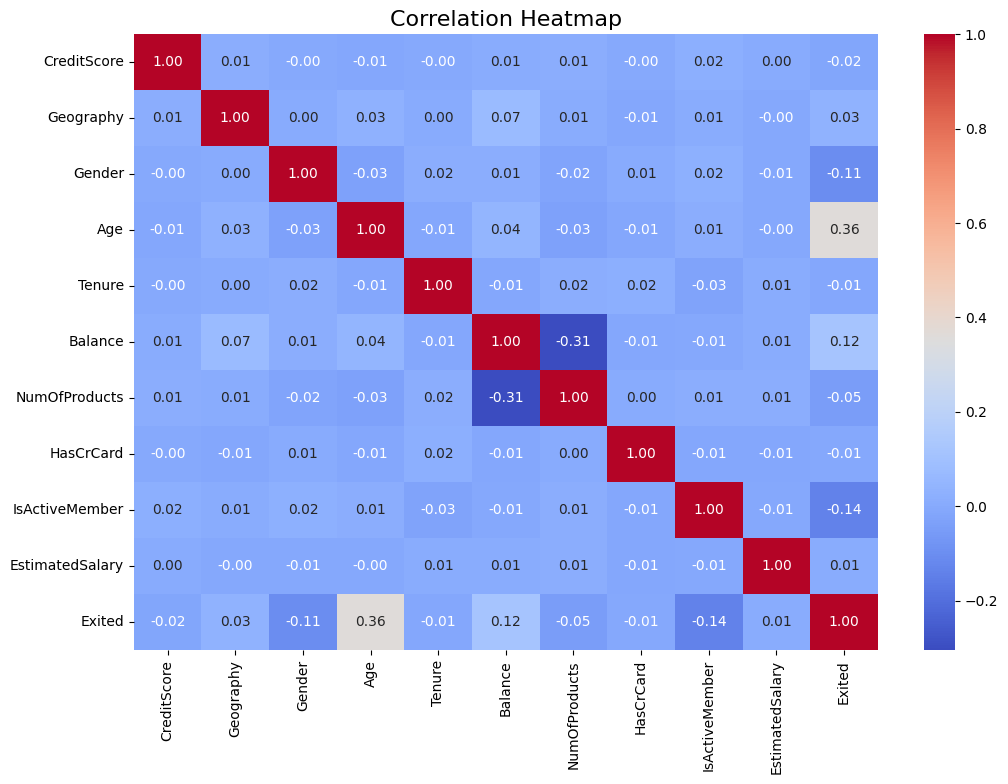

In [24]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Set up the figure
plt.figure(figsize=(12,8))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heatmap", fontsize=16)
plt.show()


Countplots to Show the Trend of Features with Respect to Target¶

Counterplots are best for observing feature values with the target variable.

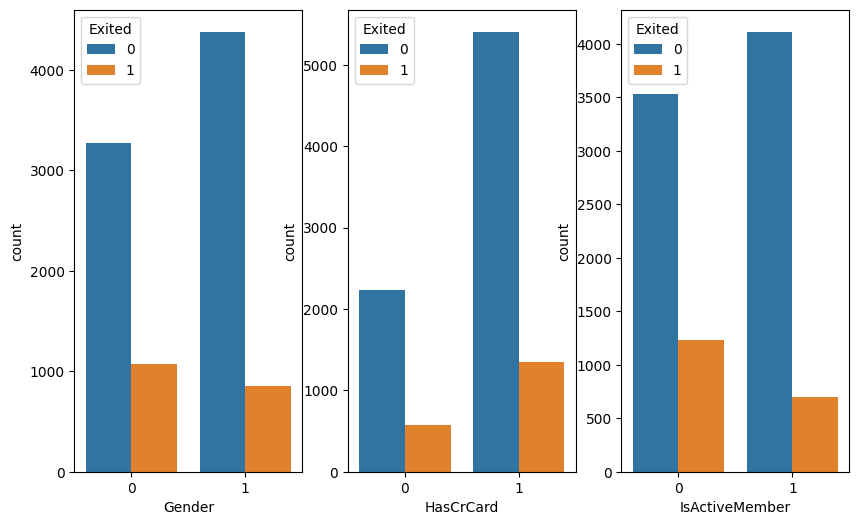

In [25]:
fig, ax = plt.subplots(1,3, figsize = (10,6))
categorical_features=['Gender','HasCrCard','IsActiveMember']
for i, subplot in zip(categorical_features, ax.flatten()):
    sns.countplot(x = i, hue="Exited", data = df, ax = subplot)

plt.show()

- The plots show that female customers have a higher churn rate compared to males.

- Customers who own a credit card appear less likely to leave the bank.

- Similarly, active members, whether through transactions or regular bank visits, tend to have a lower probability of churn.

## Model Building

We are now ready to develop our Customer Churn Prediction Model. Before proceeding, we need to decide which machine learning algorithm is most suitable for this task.

Since our dataset contains only about 10,000 records, we should choose an algorithm that performs well with relatively small training data. Decision Trees are an excellent choice because they are:

- Easy to implement.

- Highly interpretable.

- Effective on small datasets.

- Capable of handling both numerical and categorical features with minimal preprocessing.

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [27]:
dtree=DecisionTreeClassifier()

In [28]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [29]:
X=df.drop('Exited',axis=1)
y=df['Exited']

In [31]:
# Spit data to train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [32]:
X_train.shape

(6701, 10)

In [33]:
X_test.shape

(2872, 10)

In [34]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [35]:
dtree_predict=dtree.predict(X_test)

In [37]:
dtree_predict[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [41]:
print(y_test[:10])

5901    0
3329    0
3086    0
4817    0
9970    0
250     0
3536    0
1937    0
1559    0
3919    0
Name: Exited, dtype: int64


In [42]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

In [43]:
print(f" Classification report :\n {classification_report(y_test,dtree_predict)}")

 Classification report :
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      2290
           1       0.45      0.44      0.45       582

    accuracy                           0.78      2872
   macro avg       0.65      0.65      0.65      2872
weighted avg       0.78      0.78      0.78      2872



In [44]:
print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, dtree_predict))
print("F1-Score (Test Set): %.2f" % f1_score(y_test, dtree_predict))

Accuracy (Test Set): 0.78
F1-Score (Test Set): 0.45


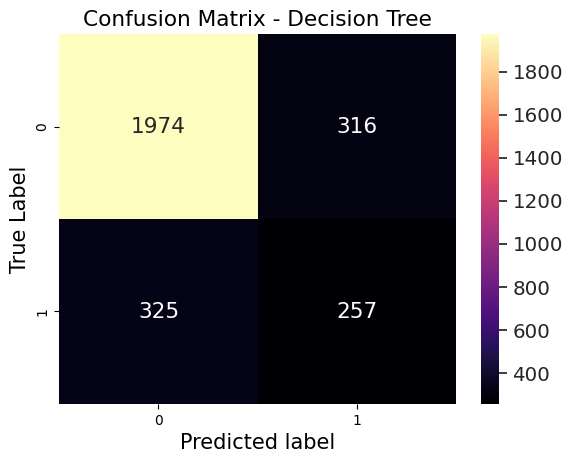

<Figure size 1000x700 with 0 Axes>

In [45]:
matrix_df = pd.DataFrame(confusion_matrix(y_test,dtree_predict))#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15)
plt.show()

#### Tuning the parameters

In [46]:
dtc_new = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 10, min_samples_leaf = 6 , max_features = 'sqrt', random_state = 1)
dtc_new.fit(X_train,y_train)
dtc_predict=dtc_new.predict(X_test)

#### Hyperparameters for Decision Tree Training

We can use the Decision Tree Classifier from sklearn and adjust its default hyperparameters to improve model performance.

- Criterion: Determines the function used to measure the quality of a split.

- Default:
    - Gini index → estimates the probability of misclassification.
    - Alternative: Entropy → measures the impurity or randomness in the data.

- min_samples_split: Minimum number of samples required to split an internal node. Recommended range: 8–10.

- min_samples_leaf: Minimum number of samples required to be at a leaf node. Recommended range: 2–6.

- Other parameters to consider tuning: max_depth, max_features, class_weight.

We can then evaluate the model’s performance before and after hyperparameter tuning to see if the adjustments improve prediction accuracy, especially for churners.

In [47]:
print(f" Classification report :\n {classification_report(y_test,dtc_predict)}")
print(f" Confusion Matrix  :\n {confusion_matrix(y_test,dtc_predict)}")

 Classification report :
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      2290
           1       0.65      0.42      0.51       582

    accuracy                           0.84      2872
   macro avg       0.76      0.68      0.71      2872
weighted avg       0.82      0.84      0.82      2872

 Confusion Matrix  :
 [[2157  133]
 [ 337  245]]


In [48]:
print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, dtc_predict))
print("F1-Score (Test Set): %.2f" % f1_score(y_test, dtc_predict))

Accuracy (Test Set): 0.84
F1-Score (Test Set): 0.51
